In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
## Reading test and train dataset

train_df=pd.read_csv(r"..\Notebooks\Train_dataset.csv")
test_df=pd.read_csv(r"..\Notebooks\Test_dataset.csv")

In [13]:
train_df['Timestamp']=pd.to_datetime(train_df['Timestamp'])
train_df['Date']=pd.to_datetime(train_df['Date'])

# creating year data column
train_df['Year']= train_df['Date'].dt.year


train_df.head()

,obs_id,SiteId,Timestamp,Value,Temperature,Date,Holiday,hour,day_of_the_week,Month,Season,Year
0,2512063,40,2017-01-11 04:30:00+00:00,10879.083336,-4.0,2017-01-11,Working Day,4,2,1,Winder,2017
1,2512063,40,2017-01-11 04:30:00+00:00,10879.083336,-1.0,2017-01-11,Working Day,4,2,1,Winder,2017
2,1148116,40,2017-01-14 20:30:00+00:00,4001.425865,-2.0,2017-01-14,Working Day,20,5,1,Winder,2017
3,1148116,40,2017-01-14 20:30:00+00:00,4001.425865,-3.0,2017-01-14,Working Day,20,5,1,Winder,2017
4,7587273,40,2017-01-15 14:30:00+00:00,10088.216946,2.0,2017-01-15,Working Day,14,6,1,Winder,2017


In [14]:
# Converting Value Columns into kW (by deviding value by 1000)

train_df['Value_kW'] = train_df['Value'] / 1000

train_df=train_df.drop(columns=['Value'])

train_df.head()

,obs_id,SiteId,Timestamp,Temperature,Date,Holiday,hour,day_of_the_week,Month,Season,Year,Value_kW
0,2512063,40,2017-01-11 04:30:00+00:00,-4.0,2017-01-11,Working Day,4,2,1,Winder,2017,10.879083
1,2512063,40,2017-01-11 04:30:00+00:00,-1.0,2017-01-11,Working Day,4,2,1,Winder,2017,10.879083
2,1148116,40,2017-01-14 20:30:00+00:00,-2.0,2017-01-14,Working Day,20,5,1,Winder,2017,4.001426
3,1148116,40,2017-01-14 20:30:00+00:00,-3.0,2017-01-14,Working Day,20,5,1,Winder,2017,4.001426
4,7587273,40,2017-01-15 14:30:00+00:00,2.0,2017-01-15,Working Day,14,6,1,Winder,2017,10.088217


In [15]:
print("Rows :",train_df.shape[0])
print("Columns :",train_df.shape[1])
print("\nFeatures :\n",train_df.columns.tolist())
print("\nMissing Values :", train_df.isna().any())
print("\nUnique values :\n",train_df.nunique())

Rows : 413082
Columns : 12

Features :
 ['obs_id', 'SiteId', 'Timestamp', 'Temperature', 'Date', 'Holiday', 'hour', 'day_of_the_week', 'Month', 'Season', 'Year', 'Value_kW']

Missing Values : obs_id             False
SiteId             False
Timestamp          False
Temperature        False
Date               False
Holiday            False
hour               False
day_of_the_week    False
Month              False
Season             False
Year               False
Value_kW           False
dtype: bool

Unique values :
 obs_id             326985
SiteId                 28
Timestamp           79708
Temperature           350
Date                 1777
Holiday                39
hour                   24
day_of_the_week         7
Month                  12
Season                  4
Year                    5
Value_kW            99535
dtype: int64


In [16]:
# Creating a copy 

train_df_non_indexed=train_df.copy()

In [17]:
total_values=train_df.groupby('SiteId')['Value_kW'].count()
total_values

SiteId
2     45590
3       525
5       299
6     76075
7       627
8     63132
9     48615
10     1284
12      422
16      726
19    45500
20     4333
22       12
23       76
25    33484
26     3903
29     1768
32      786
33    23446
38     1747
40    32011
41        3
44      118
46    13036
48       64
49     4479
50     9471
51     1550
Name: Value_kW, dtype: int64

In [18]:
new_df=train_df.loc[(train_df['SiteId']==6) &(train_df['Value_kW'] != 0), ['Value_kW','Timestamp']]
new_df

,Value_kW,Timestamp
10754,27.795247,2017-08-02 18:30:00+00:00
10755,21.124388,2017-08-03 06:00:00+00:00
10756,21.124388,2017-08-03 06:00:00+00:00
10757,37.801536,2017-08-03 07:30:00+00:00
10758,18.530165,2017-08-04 04:30:00+00:00
...,...,...
398584,18.530165,2017-08-01 22:30:00+00:00
398585,16.306545,2017-08-02 02:00:00+00:00
398586,17.047752,2017-08-02 04:00:00+00:00
398587,17.047752,2017-08-02 04:30:00+00:00


In [19]:
new_df.set_index('Timestamp', inplace=True)

# Resampling to daily frequency and summing up the energy consumption
daily_energy = new_df['Value_kW'].resample('D').sum()

# Resetting the index to get a clean DataFrame
daily_energy_df = daily_energy.reset_index()

# Displaying the result
print(daily_energy_df)

                     Timestamp     Value_kW
0    2013-01-01 00:00:00+00:00   371.205526
1    2013-01-02 00:00:00+00:00   792.396172
2    2013-01-03 00:00:00+00:00   748.340705
3    2013-01-04 00:00:00+00:00   788.319536
4    2013-01-05 00:00:00+00:00   740.650687
...                        ...          ...
1752 2017-10-19 00:00:00+00:00  1566.354830
1753 2017-10-20 00:00:00+00:00  1434.605358
1754 2017-10-21 00:00:00+00:00   893.153943
1755 2017-10-22 00:00:00+00:00   885.371274
1756 2017-10-23 00:00:00+00:00   111.551592

[1757 rows x 2 columns]


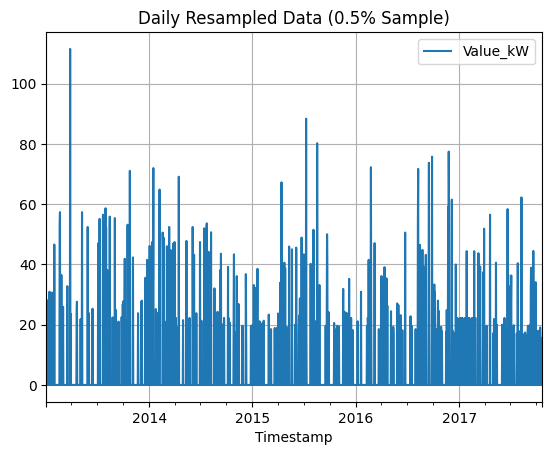

In [20]:
new_df.index = pd.to_datetime(new_df.index)

# Sample 0.5% of the data randomly
sampled_df = new_df.sample(frac=0.005, random_state=1)  # Set random_state for reproducibility

# Resample the sampled dataset into daily values
daily_df = sampled_df.resample('D').sum()

# Plot the resampled data
daily_df.plot(grid=True)
plt.title('Daily Resampled Data (0.5% Sample)')
plt.show()


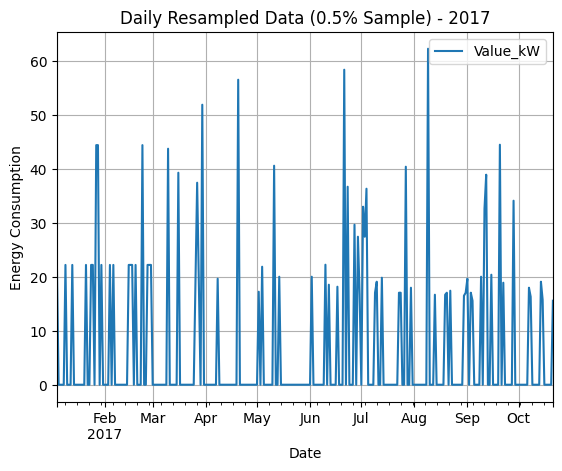

In [21]:
import matplotlib.pyplot as plt

# Ensure the index is datetime
new_df.index = pd.to_datetime(new_df.index)

# Sample 0.5% of the data randomly
sampled_df = new_df.sample(frac=0.005, random_state=1)  # Set random_state for reproducibility

# Filter the sampled data to include only the year 2017
sampled_df_2017 = sampled_df[sampled_df.index.year == 2017]

# Resample the filtered dataset into daily values
daily_df_2017 = sampled_df_2017.resample('D').sum()

# Plot the resampled data
daily_df_2017.plot(grid=True)
plt.title('Daily Resampled Data (0.5% Sample) - 2017')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()
